# Project 1: Sentiment Analysis on Movie Reviews

In this project, you are expected to solve the classification problem on movie reviews. Movie reviews have two different sentiments (positive or negative), please train machine learning or deep learning models to classify movie reviews into correct categories (1 for positive and 0 for negative).


**HINT:**
* Here are some related tutorials that would be helpful:
    * https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/code
    * https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html 



# Data Exploration: Exploring the Dataset



In [1]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load dataset
df = pd.read_csv("IMDB Dataset.csv")

# Display basic info
display(df.head())
display(df.info())
display(df['sentiment'].value_counts())

# Convert sentiment labels to binary (positive -> 1, negative -> 0)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


None

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

# Data Preproccessing

Here are some common preproccessing steps, feel free to add more preproccessing steps if needed: 
1. check missing values. 
2. remove noise and special characters, such as "\[[^]]*\]", etc.
3. transform all words to lower case, 
4. word tokenization  
5. stop words removing and stemming,
6. divide the dataset into train set (75%) and test set (25%) with random sampling

 ......

**Hint:**
* You may need TfidVectorizer class to convert a collection of raw documents to a matrix of TF-IDF features: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html, 
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org).
 


In [3]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary



# Data Preprocessing

# Check for missing values
display(df.isnull().sum())

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"\[[^]]*\]", "", text)  # Remove text inside brackets
    return text

# Apply cleaning
df['review'] = df['review'].apply(clean_text)

import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Tokenization, Stopwords Removal, and Stemming (for traditional ML Models)
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing (only for traditional ML models)
df['processed_review'] = df['review'].apply(preprocess_text)


# Data Split (For Both TF-IDF & CNN)
# Split data (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(df['processed_review'], df['sentiment'], test_size=0.25, random_state=42)


# TF-IDF Vectorization (For ML Models)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Tokenization + Padding (For CNN)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize text using the same train-test split
tokenizer = Tokenizer(num_words=5000)  
tokenizer.fit_on_texts(X_train)  

# Convert training and test sets to sequences
X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=200)
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=200)

# Display processed reviews
display(df[['review', 'processed_review']].head(10))



review       0
sentiment    0
dtype: int64

[nltk_data] Downloading package stopwords to /Users/lucky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lucky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,processed_review
0,one of the other reviewers has mentioned that ...,one review mention watch oz episod youll hook ...
1,a wonderful little production br br the filmin...,wonder littl product br br film techniqu unass...
2,i thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...
3,basically theres a family where a little boy j...,basic there famili littl boy jake think there ...
4,petter matteis love in the time of money is a ...,petter mattei love time money visual stun film...
5,probably my alltime favorite movie a story of ...,probabl alltim favorit movi stori selfless sac...
6,i sure would like to see a resurrection of a u...,sure would like see resurrect date seahunt ser...
7,this show was an amazing fresh innovative ide...,show amaz fresh innov idea first air first yea...
8,encouraged by the positive comments about this...,encourag posit comment film look forward watch...
9,if you like original gut wrenching laughter yo...,like origin gut wrench laughter like movi youn...


# Data Modelling

* Please use the following models to classify the data:
    * Logistic Regression
    * LinearSVC
    * KNeighborsClassifier
    * Fully-connected layers, please try different number of hidden layers, different values of "hidden_layer_sizes" and "activation".
    * CNN (please use different number of convolutional layers combined with different number of fully-connected layers, and compare the results).


In [5]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Train and Evaluate Traditional ML Models

# Initialize models with different hidden layers and activation functions
models = {
    "Logistic Regression": LogisticRegression(),
    "Linear SVC": LinearSVC(dual=False),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "MLP (1 layer, 100 neurons)": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000),
    "MLP (2 layers, 150-100 neurons)": MLPClassifier(hidden_layer_sizes=(150, 100), activation='relu', max_iter=1000),
    "MLP (3 layers, 200-100-50 neurons)": MLPClassifier(hidden_layer_sizes=(200, 100, 50), activation='tanh', max_iter=1000),
}

# Train and evaluate ML models
results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Model Performance:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


# train and evaluate CNN Model
# Define CNN model
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128),  # Embedding layer
    Conv1D(filters=128, kernel_size=5, activation='relu'),  # Convolutional layer
    GlobalMaxPooling1D(),  # Pooling layer
    Dense(64, activation='relu'),  # Fully connected layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
cnn_model.fit(X_train_pad, y_train, epochs=15, batch_size=32, validation_data=(X_test_pad, y_test), callbacks=[early_stopping])


# evaluate CNN model
loss, acc = cnn_model.evaluate(X_test_pad, y_test)
print(f"\nCNN Model Accuracy: {acc:.4f}")

# Add CNN accuracy to results dictionary
results["CNN Model"] = acc  # Store CNN accuracy




Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6157
           1       0.88      0.90      0.89      6343

    accuracy                           0.88     12500
   macro avg       0.89      0.88      0.88     12500
weighted avg       0.89      0.88      0.88     12500

Confusion Matrix:
[[5360  797]
 [ 641 5702]]

Linear SVC Model Performance:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6157
           1       0.87      0.89      0.88      6343

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500

Confusion Matrix:
[[5349  808]
 [ 714 5629]]

K-Nearest Neighbors Model Performance:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      6157
           1       0.77      0.77   

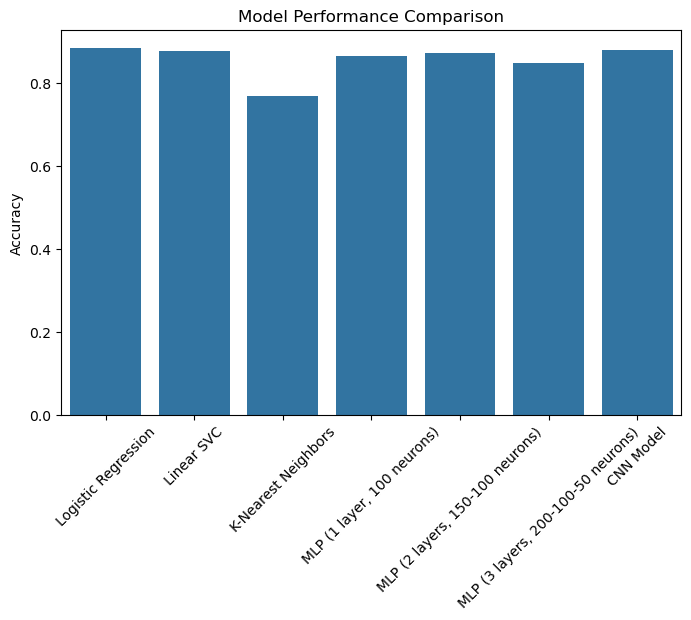

In [9]:

# Compare All Models

# Display accuracy of all models
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()


# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


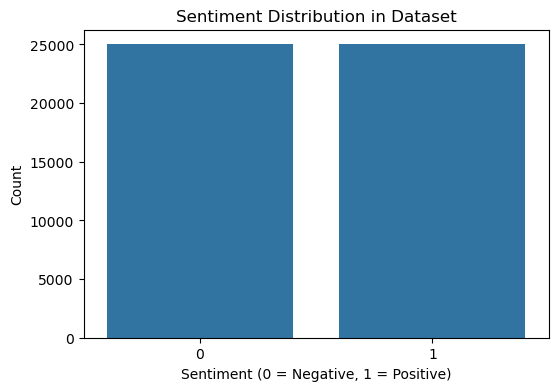

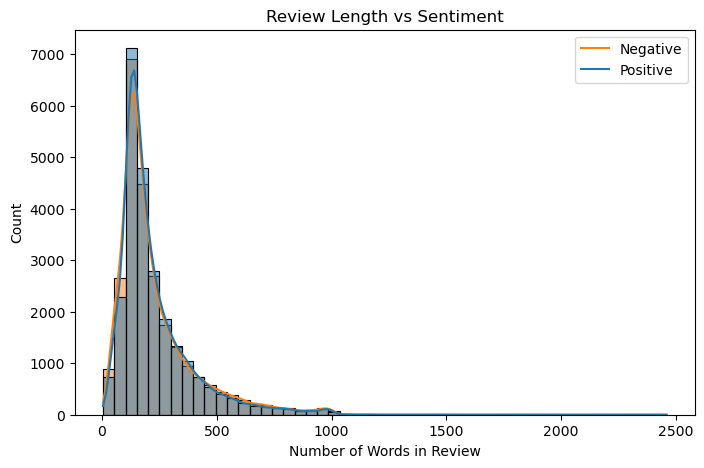

In [11]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# A summary of the analysis will be included in the report

# Sentiment Analysis and Data Insights

# 1. Visualizing sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'])
plt.title("Sentiment Distribution in Dataset")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

# 2. Review length analysis
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True)
plt.title("Review Length vs Sentiment")
plt.xlabel("Number of Words in Review")
plt.ylabel("Count")
plt.legend(["Negative", "Positive"])
plt.show()



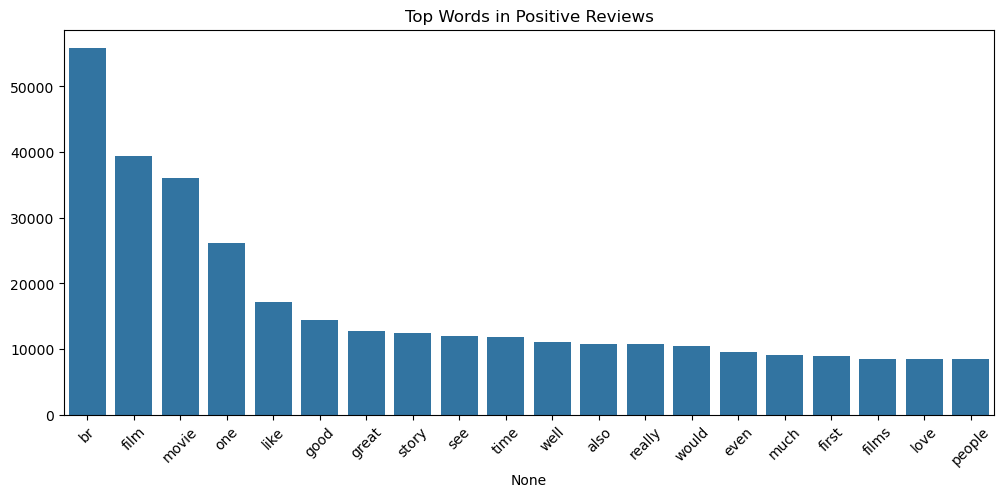

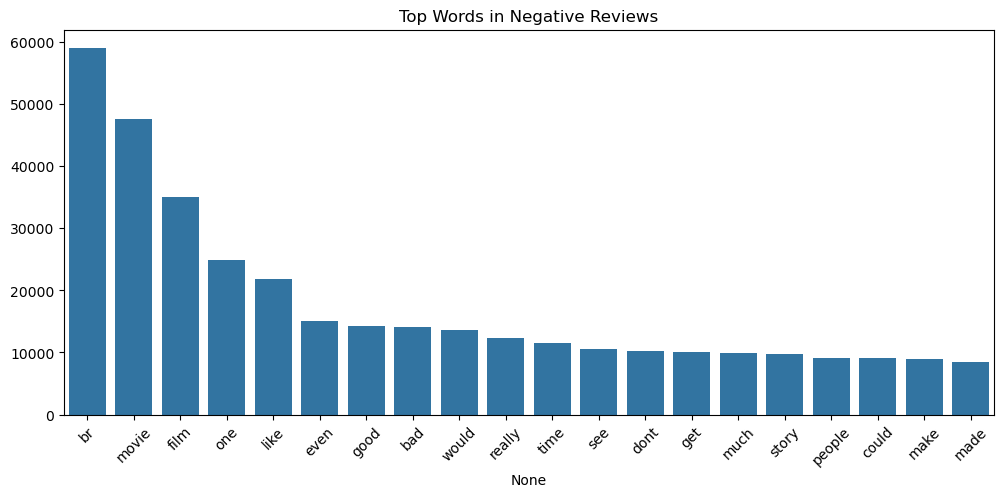

In [13]:
# Sentiment Analysis and Data Insights

# 3. Most common words in positive and negative reviews
positive_reviews = df[df['sentiment'] == 1]['review']
negative_reviews = df[df['sentiment'] == 0]['review']

def get_top_words(text_series, n=20):
    words = " ".join(text_series).lower().split()
    words = [word for word in words if word not in stop_words and word.isalpha()]
    word_freq = pd.Series(words).value_counts()
    return word_freq[:n]

# Plot top words
plt.figure(figsize=(12,5))
sns.barplot(x=get_top_words(positive_reviews).index, y=get_top_words(positive_reviews).values)
plt.xticks(rotation=45)
plt.title("Top Words in Positive Reviews")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=get_top_words(negative_reviews).index, y=get_top_words(negative_reviews).values)
plt.xticks(rotation=45)
plt.title("Top Words in Negative Reviews")
plt.show()


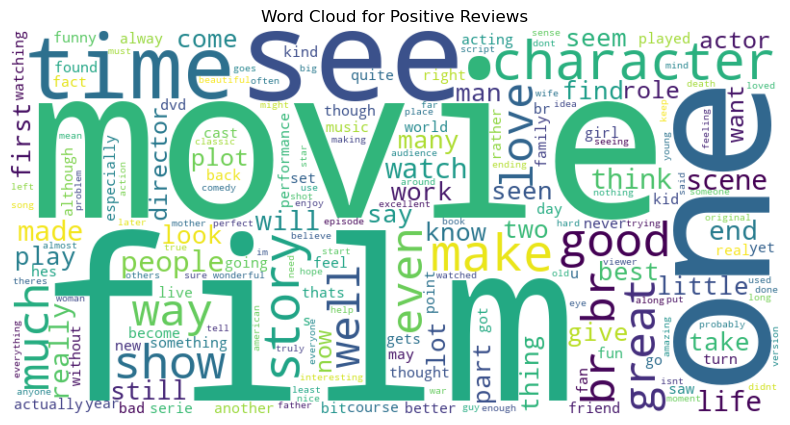

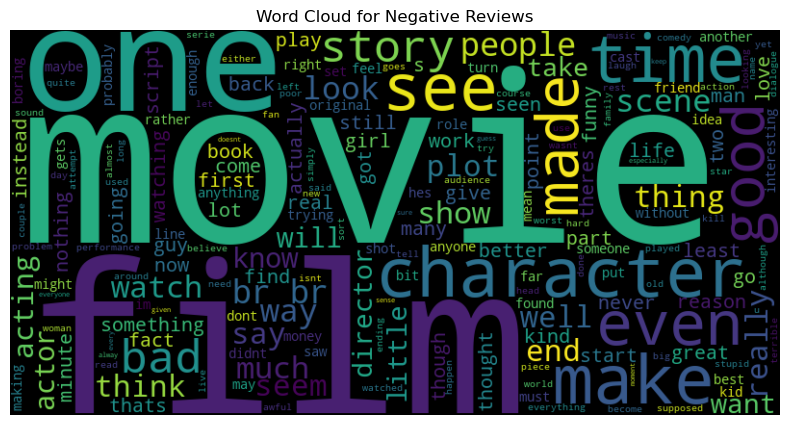

In [15]:
# Sentiment Analysis and Data Insights

# 4. Word Cloud for Positive and Negative Reviews
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()


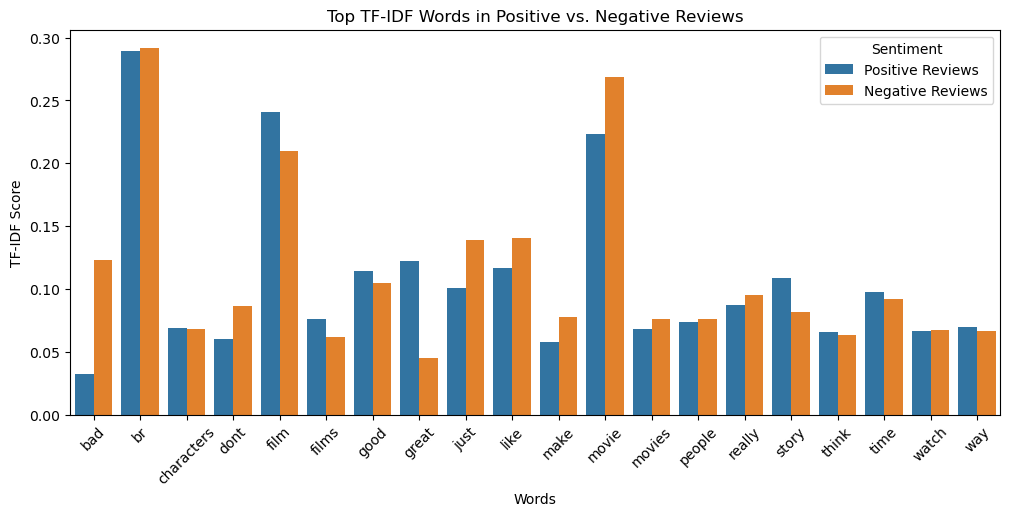

In [17]:
# Sentiment Analysis and Data Insights

# 5. TF-IDF Analysis: Identify the most important words for each sentiment

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=20, stop_words='english', min_df=5)  
X_tfidf = vectorizer.fit_transform(df['review'])

# Get TF-IDF feature words
tfidf_words = vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_words)

# Add sentiment labels
tfidf_df['sentiment'] = df['sentiment'].reset_index(drop=True)

# Compute the average TF-IDF score for each word in positive and negative reviews
tfidf_pos = tfidf_df[tfidf_df['sentiment'] == 1].drop(columns='sentiment').mean()
tfidf_neg = tfidf_df[tfidf_df['sentiment'] == 0].drop(columns='sentiment').mean()

# Create a DataFrame for visualization
tfidf_diff = pd.DataFrame({'Positive': tfidf_pos, 'Negative': tfidf_neg}).reset_index()
tfidf_diff = tfidf_diff.rename(columns={'index': 'Word'})

# Plot comparison chart
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=tfidf_diff.melt(id_vars='Word', var_name='Sentiment', value_name='TF-IDF Score'),
                 x='Word', y='TF-IDF Score', hue='Sentiment')


handles, labels = ax.get_legend_handles_labels()  # Get actual color mappings
plt.legend(handles=handles, labels=["Positive Reviews", "Negative Reviews"], title="Sentiment")

plt.title("Top TF-IDF Words in Positive vs. Negative Reviews")
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.show()
